# Projeto 1 - ligando um arduino 

### Camila Junqueira, João Oliveira, Lucca Nasser, Stephani Ferreira 

In [1]:
# Imports
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

### 1) Item 6

Atualização dos parâmetros da simulação da atividade 2) (simulação): como agora vocês têm os parâmetros reais medidos das bobinas e capacitores, devem atualizar os parâmetros do modelo construído na atividade 2). Como estamos trabalhando com uma tensão quadrada na entrada da bobina primária, precisamos fazer uma pequena alteração na amplitude da função senoidal usada na simulação. Para isso, utilize a expressão: 

𝑽𝟏(𝒕) = (𝟐/𝝅) * 𝑽𝒑 𝒄𝒐𝒔(𝝎𝒕) 

Nessa expressão, 𝑉𝑝 é a amplitude da onda quadrada (alimentação dos MOSFETs). Os professores ficarão felizes em explicar por que isso é necessário. 

### 2) Código do Modelo

#### Definindo os Parâmetros

In [2]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

### 3) Escolha da Frequência de Operação, Capacitores e Indutância

#### Função de Cálculo das Correntes $Î_1$ e $Î_2$

In [6]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1,-XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,0
                ])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

#### Gráfico $V_2$ x $f$ dos Capacitores

In [8]:
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

Uf = (2/pi)*19
Rc = 102
k = 0.1


V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

Rdc = 0.5

n = 0

indices: [28, 29, 30, 31, 32, 33, 15110, 15111, 15112, 15113, 15114, 15115, 15116, 15117, 15118, 15119, 15120, 15121, 15122, 15123, 15124, 15125, 15126, 15127, 15128, 15129, 15130, 15131, 15132, 15133, 15134, 15135, 15136, 15137, 15138, 15139, 15140, 15141, 15142, 15143, 15144, 15145, 15146, 15147, 15148, 15149, 15150, 15151, 15152, 15153, 15154, 15155, 15156, 15157, 15158, 15159, 15160, 15161, 15162, 15163, 15164, 15165, 15166, 15167, 15168, 15169, 15170, 15171, 15172, 15173, 15174, 15175, 15176, 15177, 15178, 15179, 15180, 15181, 15182, 15183, 15184, 15185, 15186, 15187, 15188, 15189, 15190, 15191, 15192, 15193, 15194, 15195, 15196, 15197, 15198, 15199, 15200, 15201, 15202, 15203, 15204, 15205, 15206, 15207, 15208, 15209, 15210, 15211, 15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15225, 15226, 15227, 15228, 15229, 15230, 15231, 15232, 15233, 15234, 15235, 15236, 15237, 15238, 15239, 15240, 15241, 15242, 15243, 15244, 15245, 15246, 15247, 

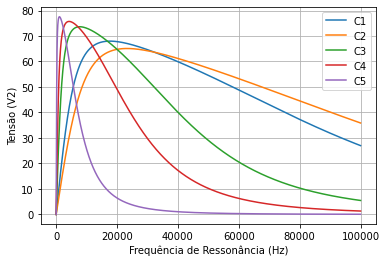

In [9]:
for C in capacitores:
    V2_list = []
    L_list = []
    f_list = []
    indices = []
    v2_corr = []

    n = n + 1
    for f in frequencias:
        
        f_list.append(f)

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        V2_list.append(abs(V2))
    
    for j, valor in enumerate(V2_list):
        if 10 <= valor <= 12:
            indices.append(j)
            v2_corr.append(valor)
    
    if n == 5:
        print(f'indices: {indices}')
        print(f'V2: {v2_corr}')
        print()
        print(f'Capacitor: C{n},\nÍndices: {indices}')
        for i in indices:
            print(f'Tensão: {V2_list[i]}')
            print(f'Indutância: {L_list[i]}')
            print(f'Frequência: {f_list[i]}')
            print()

    plt.plot(frequencias, V2_list, label="C" + str(n))
    plt.xlabel("Frequência de Ressonância (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()
plt.show()

In [ ]:
'oii'